# Employement Attrition Analysis

#### What is Employement Attrition?
* Employee attrition refers to the loss of employees due to life events such as retirement, resignation initiated by the employee, elimination of a position, or other similar event

#### Is Employement Attrition bad?
* Attrition offers opportunities for new ideas and dynamics. It can refresh an organization and offer current employees new opportunities
* It’s not always easy to change the culture of an organization, especially without replacing entire teams. Natural employee attrition allows employers to refresh a company culture without firing or layoffs
* Employement attrition is not always bad, but high employement attrition is bad

## Data Collection

In [1]:
# Importing the libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data

df = pd.read_csv('D:/Programming/Projects/Artrition rate of employees/HR - Attrition Data.csv')

## Data Exploration

In [3]:
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,Yes,11,3,1,8,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,10,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,Yes,15,3,2,7,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,Yes,11,3,3,8,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,No,12,3,4,6,3,2,2,2,2


In [4]:
# (rows, columns)

df.shape

(1470, 25)

In [5]:
df.describe(include='all')

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470.000000,1470,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,...,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,2,NaN,3,3,NaN,NaN,6,NaN,2,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1233,NaN,1043,961,NaN,NaN,606,NaN,882,NaN,...,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.923810,NaN,NaN,9.192517,2.912925,NaN,2.721769,NaN,2.729932,...,NaN,15.209524,3.153741,2.712245,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,NaN,9.135373,NaN,NaN,8.106864,1.024165,NaN,1.093082,NaN,0.711561,...,NaN,3.659938,0.360824,1.081209,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,NaN,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.000000,...,NaN,11.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,30.000000,NaN,NaN,2.000000,2.000000,NaN,2.000000,NaN,2.000000,...,NaN,12.000000,3.000000,2.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,NaN,36.000000,NaN,NaN,7.000000,3.000000,NaN,3.000000,NaN,3.000000,...,NaN,14.000000,3.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,NaN,43.000000,NaN,NaN,14.000000,4.000000,NaN,4.000000,NaN,3.000000,...,NaN,18.000000,3.000000,4.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [6]:
# Exploring the non-number type columns

for column  in df.columns:
    if df[column].dtype == object:
        print('\033[1m' + column + ':' + '\033[0m')
        print(df[column].value_counts(),end='\n\n\n')

Attrition:
No     1233
Yes     237
Name: Attrition, dtype: int64


BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Gender:
Male      882
Female    588
Name: Gender, dtype: int64


JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


MaritalStatus:
Married     673
Single      470
Divorced    327
Name: 

In [7]:
#As we can see, the null value count is zero.

## Data Visualization

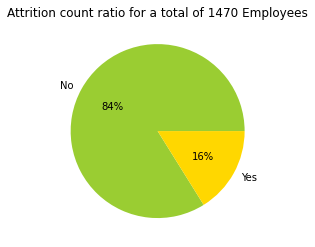

In [8]:
plt.pie(df['Attrition'].value_counts(), labels=['No', 'Yes'],colors=['yellowgreen','gold'], autopct='%.0f%%')
plt.title('Attrition count ratio for a total of 1470 Employees')
plt.show()

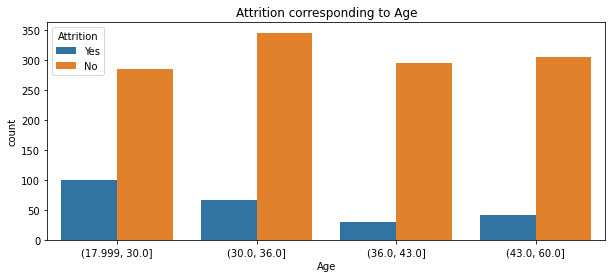

In [9]:
x = pd.qcut(df['Age'],q=4)
plt.figure(figsize=(10,4))
plt.title('Attrition corresponding to Age')
sns.countplot(x=x,hue='Attrition',data=df)
plt.show()

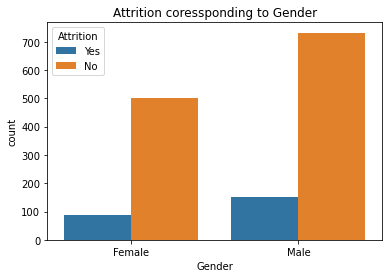

In [10]:
sns.countplot(x='Gender',hue='Attrition',data=df)
plt.title('Attrition coressponding to Gender')
plt.show()

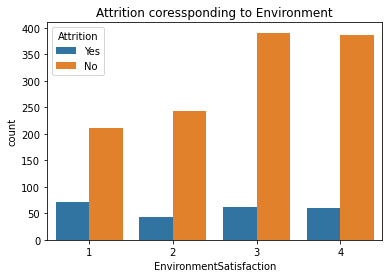

In [11]:
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df)
plt.title('Attrition coressponding to Environment')
plt.show()

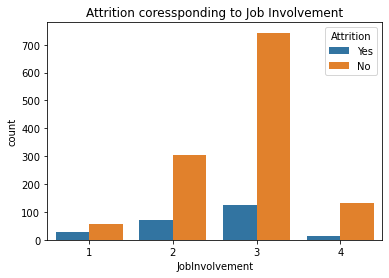

In [12]:
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)
plt.title('Attrition coressponding to Job Involvement')
plt.show()

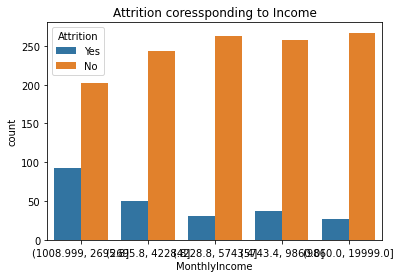

In [13]:
x = pd.qcut(df['MonthlyIncome'],q=5)
sns.countplot(x=x,hue='Attrition',data=df)
plt.title('Attrition coressponding to Income')
plt.show()

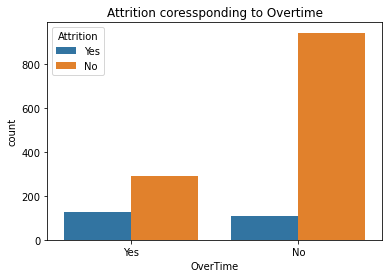

In [14]:
sns.countplot(x='OverTime',hue='Attrition',data=df)
plt.title('Attrition coressponding to Overtime')
plt.show()

<AxesSubplot:>

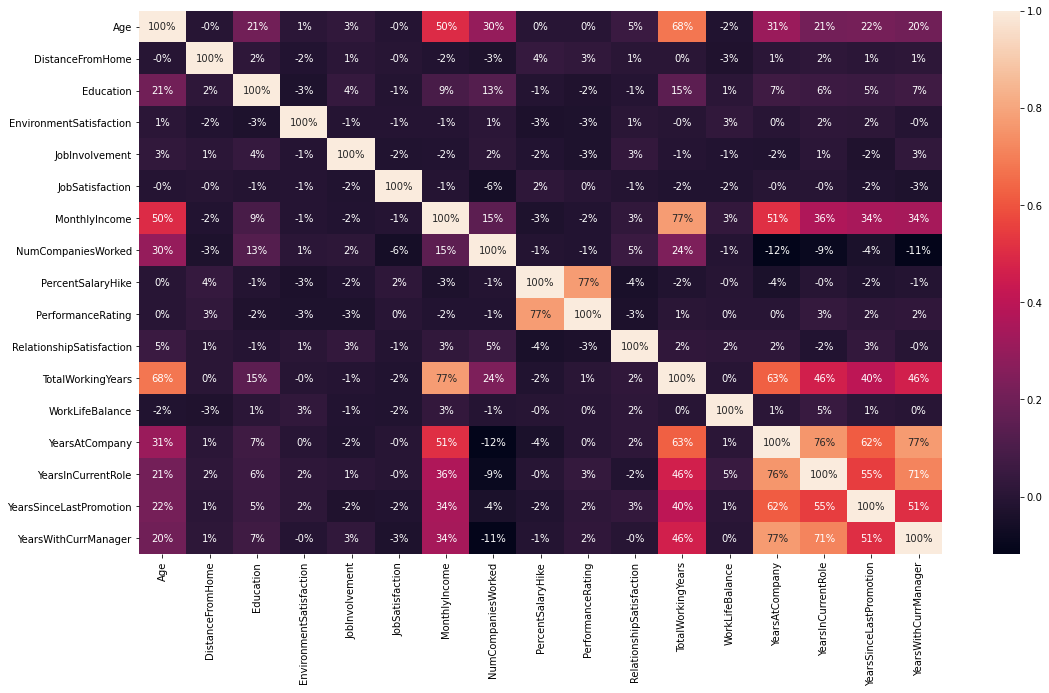

In [15]:
# Correlation of numerical values of the data

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot = True, fmt='.0%')

## Data Preparation

In [16]:
# Converting object type data to values

from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == object:
        df[column] = LabelEncoder().fit_transform(df[column])

## Model Building

In [17]:
# Importing the libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [18]:
# Splitting the data to training and testing data

X = df.drop('Attrition',axis = 1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
# Building the Random Forest model with training data

forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
print('\033[1m'+'Training Data accuracy:' + '\033[0m',forest.score(X_train,y_train))

Training Data accuracy: 1.0


In [21]:
c = confusion_matrix(y_test,forest.predict(X_test))
TP = c[0][0]
TN = c [1][1]
FN = c[1][0] 
FP = c[0][1]
print('\033[1m' + 'Confusion Matrix:' + '\033[0m')
print('True Positive: {}\tFalse Positive: {}\nFalse Negative: {}\tTrue Negative: {}'.format(TP,FP,FN,TN))
print()
print('\033[1m' + 'Testing Data accuracy:' + '\033[0m',forest.score(X_test,y_test))

Confusion Matrix:
True Positive: 247	False Positive: 1
False Negative: 39	True Negative: 7

Testing Data accuracy: 0.8639455782312925


## Conclusion

#### From the Data Visualisation we can depict:
* Younger employees attrit more when compared to older employees
* Lower income employees attrit more in number
* Lack of job involvement or job satisfaction lead to attrit
* Overtime jobs have more attrition 
* Employees who travel frequently have high attrition

#### Factors that would reduce Employee Attrition:
* Providing a good environment
* Good management and open conversations with managers 
* Good job involvement through real time feedback and recognition
* Increasing bonus and salary hikes and providing opportunities to advance
* Reducing the workload and therby reducing the factor of overtime